## 이미지 학습

- 학습셋 이미지 데이터/ 테스트셋 이미지 데이터 나누기
- 이미지를 숫자화 하기
- 차원 치환하기
- 바이너리화 과정
- 학습
- 모델 저장하기
- 테스트 셋으로 모델 검증하기
- Accuracy 출력

학습셋 이미지 수 : 60000개
테스트 셋 이미지 수 : 10000개


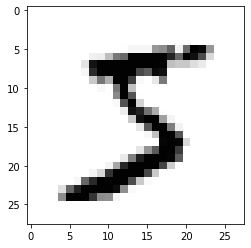

000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000003018018018126136175026166255247127000000000000
000000000000000000000000030036094154170253253253253253225172253242195064000000000000
000000000000000000000049238253253253253253253253253251093082082056039000000000000000
000000000000000000000018219253253253253253198182247241000000000000000000000000000000
000000000000000000000000080156107253253205011000043154000000000000000000000000000000
000000000000000000000000000014001154253090000000000000000000000000000000000000000000
00000000000000000000000000000000013925319000200000000000000000000

Epoch 19/30
292/300 [============================>.] - ETA: 0s - loss: 0.1933 - accuracy: 0.9458
Epoch 00019: val_loss improved from 0.22804 to 0.22568, saving model to ./housing_model\19-0.225679.hdf5
300/300 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9457 - val_loss: 0.2257 - val_accuracy: 0.9385
Epoch 20/30
292/300 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9462
Epoch 00020: val_loss did not improve from 0.22568
300/300 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9465 - val_loss: 0.2263 - val_accuracy: 0.9394
Epoch 21/30
284/300 [===========================>..] - ETA: 0s - loss: 0.1897 - accuracy: 0.9472
Epoch 00021: val_loss did not improve from 0.22568
300/300 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9473 - val_loss: 0.2289 - val_accuracy: 0.9366
Epoch 22/30
267/300 [=========================>....] - ETA: 0s - loss: 0.1868 - accuracy: 0.9474
Epoch 00022:

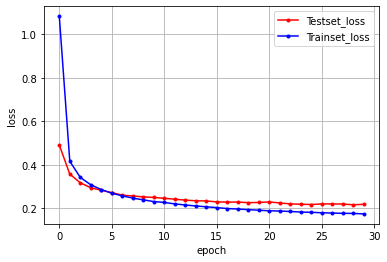

In [29]:
###########################
### 데이터 전처리 #########
###########################

from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy
import sys
import tensorflow as tf
import os
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수 : %d개' % (X_train.shape[0]))
print('테스트 셋 이미지 수 : %d개' % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%.3d'% i)
    sys.stdout.write('\n')

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값 확인
# 이 숫자의 레이블 값인 5가 출력되는 것을 볼 수 있음.
print('class : %d' % (Y_class_train[0]))

# 바이너리화 과정 -> 원-핫 인코딩으로 만들기
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])


### 784개의 속성이 있고, 10개의 클래스가 있음
model = Sequential()
model.add(Dense(10, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
# 출력 노드가 여러개일때에는  softmax  사용 / 다중분류를 위한 활성화함수
model.add(Dense(10, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

MODEL_DIR = './housing_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# epoch 는 정수형2자리 val_loss는 실수형 소수점 4자리
modelpath = './housing_model/{epoch:02d}-{val_loss:4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1,
                              save_best_only = True)


early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)


history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200,
         callbacks = [early_stopping_callback, checkpointer] )

print('\n Accuracy : %.4f' %(model.evaluate(X_test,Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

